## Gaussian Process Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp

In [ ]:
def GaussianProcessK(xv,zv,sd=1):
  return np.outer(xv,zv) + sd**2*np.equal.outer(xv,zv)

In [ ]:
N = 100
sd = 1.5
theta = 1.0

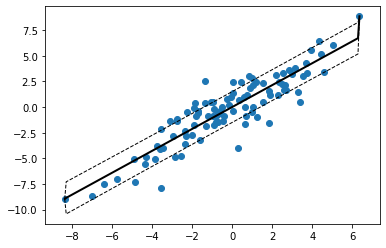

In [ ]:
X = np.random.normal(scale=3, size=N)
y = np.dot(X,theta) + np.random.normal(scale=sd, size=N)
xx = np.linspace(X.min(),X.max(),200)

K_X = GaussianProcessK(X,X,sd=sd)
kxx = GaussianProcessK(xx,X,sd=sd)
K_xx = GaussianProcessK(xx,xx,sd=sd)

GP_f = np.dot(kxx, np.linalg.solve(K_X,y))
GP_v = np.maximum(np.diag(K_xx-np.dot(kxx,np.linalg.solve(K_X,kxx.T))),0)

plt.xlim(X.min()-1,X.max()+1)
plt.scatter(X,y)
plt.plot(xx, GP_f, 'k-', lw=2)

plt.plot(xx, GP_f+np.sqrt(GP_v), 'k--', lw=1)
plt.plot(xx, GP_f-np.sqrt(GP_v), 'k--', lw=1)
plt.show()

### Regression Analysis with Gaussian Process Model

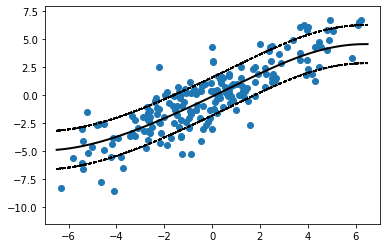

In [ ]:
N = 200
sd = 1.5
theta = 1.0

X = np.random.normal(scale=3, size=N).reshape(N,-1)
y = np.dot(X, theta) + np.random.normal(scale=sd, size=N).reshape(N,-1)

kernel = gp.kernels.RBF() + gp.kernels.WhiteKernel()
GP_model = gp.GaussianProcessRegressor(kernel = kernel)
GP_model.fit(X,y)

xx = np.linspace(-6.5,6.5,100).reshape(100,-1)
GP_f, GP_v = GP_model.predict(xx, return_cov=True)
GPsd = np.sqrt(np.diag(GP_v))

plt.xlim(-7,7)
plt.scatter(X,y)
plt.plot(xx, GP_f, 'k-', lw=2)
plt.plot(xx, GP_f+GPsd, 'k--', lw=1)
plt.plot(xx, GP_f-GPsd, 'k--', lw=1)
plt.show()

### Discrimination Analysis with Gaussian Process Model

In [ ]:
def onespiral(n, cyc=1, sd=0):
  w = np.linspace(0,cyc,n)
  x = np.zeros((n,2))
  x[:,0] = (2*w+1)*np.cos(2*np.pi*w)/3
  x[:,1] = (2*w+1)*np.sin(2*np.pi*w)/3
  if sd > 0:
    e = np.random.normal(scale=sd, size=n)
    xs = np.cos(2*np.pi*w) - np.pi*(2*w+1)*np.sin(2*np.pi*w)
    ys = np.sin(2*np.pi*w) + np.pi*(2*w+1)*np.cos(2*np.pi*w)
    nrm = np.sqrt(xs**2 + ys**2)
    x[:,0] = x[:,0] + e*ys/nrm
    x[:,1] = x[:,1] + e*xs/nrm
  return x

def spirals(n, cyc=1, sd=0, label=[0,1]):
  x = np.zeros((n,2))
  c2 = np.random.choice(n,size=round(n/2),replace=False)
  c1 = np.delete(np.arange(n),c2)
  classes = np.repeat(label[0],n)
  classes[c2] = label[1]
  x[c1,:] = onespiral(c1.size, cyc=cyc, sd=sd)
  x[c2,:] = onespiral(c2.size, cyc=cyc, sd=sd)
  return [x,classes]

In [ ]:
from sklearn.datasets import make_moons,make_circles

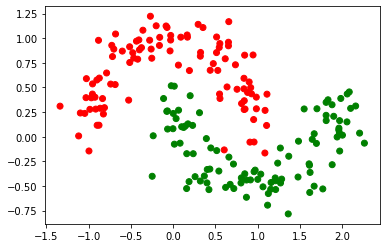

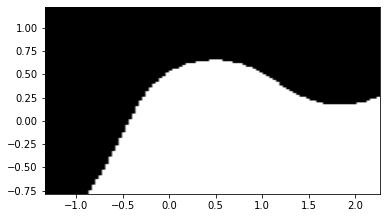

In [ ]:
X,y = make_moons(200,noise=0.15)

colors = np.array(['r','g'])
plt.scatter(X[:,0],X[:,1],c=colors[y])
plt.show()

kernel = gp.kernels.RBF()+gp.kernels.WhiteKernel()
GPmodel = gp.GaussianProcessClassifier(kernel=kernel)
GPmodel.fit(X,y)

xx = np.linspace(-1.2,1.2,100)
test_data = np.array([(y,x) for x in xx for y in xx])
GP_predict = GPmodel.predict(test_data)

ext = (np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))
plt.imshow(GP_predict.reshape(100,-1)[::-1],cmap='gray',extent=ext)
plt.show()

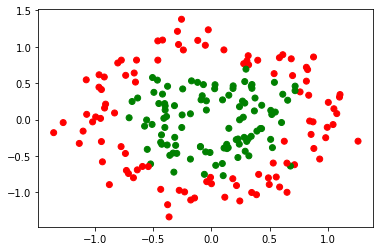

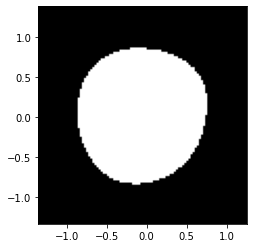

In [ ]:
X,y = make_circles(n_samples=200, factor=.5,noise=.15)

colors = np.array(['r','g'])
plt.scatter(X[:,0],X[:,1],c=colors[y])
plt.show()

kernel = gp.kernels.RBF()+gp.kernels.WhiteKernel()
GPmodel = gp.GaussianProcessClassifier(kernel=kernel)
GPmodel.fit(X,y)

xx = np.linspace(-1.2,1.2,100)
test_data = np.array([(y,x) for x in xx for y in xx])
GP_predict = GPmodel.predict(test_data)

ext = (np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))
plt.imshow(GP_predict.reshape(100,-1)[::-1],cmap='gray',extent=ext)
plt.show()